# Research on Car Sales Ads: What Factors Impact the Price Most?

Hundreds of free advertisements for vehicles are published on the site of Crankshaft List every day.
I study data collected over the last few years and determine which factors influence the price of a vehicle. The data includes the vehicle's price, model year, model, condition, cylinders, fuel, odometer value, transmission type, vehicle type, color, number of wheels, date when the ad was posted and the number of days the ad was listed.

# Table of Contents

- 1) [Open the data file and study the general information](#1)
<br> <br>
- 2) [Data preprocessing](#2)
<br> <br>
    - 2.1) [Identify and fill in the missing values](#2.1)
    - 2.2) [Convert data and find duplicates](#2.2)
    - 2.3) [Further calculations in the table](#2.3)
<br> <br>
- 3) [Exploratory data analysis](#3)
<br> <br>
    - 3.1) [Price, vehicle's age, mileage, number of cylinders and condition](#3.1)
    - 3.2) [Histogram comparison: Before and after filtering](#3.2)
    - 3.3) [Study of the advertisements](#3.3)
    - 3.4) [The number of ads and the average price for each type of vehicle](#3.4)
    - 3.5) [Factors that impact the price most](#3.5)
<br> <br>
- 4) [Overall conclusion](#4)

<a id="1"></a>

## 1) Open the data file and study the general information

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
# read csv file
try:
    df = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/expl_data_analysis_vehicles_us.csv')
except:
    print("Couldn't read csv file.")

In [3]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Conclusion

The DataFrame is a table with 13 columns and 51525 rows where some columns are quantitative and some are categorial. <br>
Every row stands for a certain new or used vehicle and every column stands for a certain information about the vehicles or their advertising on Crankshaft List. <br>
Every column of float64 type has missing values, one column of object type too ('paint_color'), the number of missing values differs within these columns. <br>
It's noticeable that the column 'is_4wd' (4-wheel drive or not) has by far the largest proportion of missing values in comparison to the other columns, but it's also the only column in the boolean type.

<a id="2"></a>

## 2) Data preprocessing

<a id="2.1"></a>

### 2.1) Identify and fill in the missing values

###### 1) Column 'paint_color'

In [5]:
# In the pivot table, all the following values are grouped by the type of vehicles.
# The number of vehicles with given colors are in the column 'all_colors', the number of vehicles with missing colors
# are in the column 'miss_colors', the percentages of the vehicles with missing colors compared to the total amount of
# vehicles of the same type are given in the column 'miss_quote' and the most common colors and their percentages
# per type are in the columns 'most_common' and 'quote_most_common'.

# create pivot table with type as index and paint_color as columns
pivot_type_color = df.pivot_table(index='type', columns='paint_color', values='price', aggfunc='count')

# add further columns to the pivot table for analysis (as explained above)
for type_veh in pivot_type_color.index:
    pivot_type_color.loc[type_veh, 'all_colors'] = pivot_type_color.loc[type_veh].sum()
    pivot_type_color_drop = pivot_type_color.drop(columns='all_colors')
    pivot_type_color.loc[type_veh, 'quote_most_common'] = 100*pivot_type_color_drop.loc[type_veh].max()/ \
    pivot_type_color.loc[type_veh, 'all_colors']
    pivot_type_color.loc[type_veh, 'miss_colors'] = len(df[(df['type'] == type_veh)&(df['paint_color'].isnull())])
    pivot_type_color.loc[type_veh, 'miss_quote'] = 100*pivot_type_color.loc[type_veh, 'miss_colors']/ \
    (pivot_type_color.loc[type_veh, 'all_colors']+pivot_type_color.loc[type_veh, 'miss_colors'])
pivot_type_color['most_common'] = pivot_type_color.drop(columns= \
['all_colors','miss_colors','miss_quote', 'quote_most_common'], inplace=False).idxmax(axis=1)

pivot_type_color

paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,all_colors,quote_most_common,miss_colors,miss_quote,most_common
type,,,,,,,,,,,,,,,,,
SUV,2220.0,1055.0,369.0,308.0,436.0,1183.0,84.0,39.0,906.0,1558.0,1962.0,49.0,10169.0,21.831055,2236.0,18.024990,black
bus,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,19.0,84.210526,5.0,20.833333,white
convertible,73.0,32.0,2.0,8.0,16.0,19.0,5.0,NaN,104.0,43.0,56.0,13.0,371.0,28.032345,75.0,16.816143,red
coupe,470.0,205.0,21.0,21.0,40.0,191.0,34.0,5.0,379.0,259.0,204.0,68.0,1897.0,24.775962,406.0,17.629179,black
hatchback,128.0,128.0,13.0,11.0,39.0,103.0,11.0,3.0,103.0,159.0,130.0,6.0,834.0,19.064748,213.0,20.343840,silver
mini-van,123.0,174.0,37.0,18.0,22.0,139.0,NaN,1.0,89.0,192.0,160.0,4.0,959.0,20.020855,202.0,17.398794,silver
offroad,23.0,19.0,3.0,5.0,17.0,16.0,1.0,NaN,39.0,19.0,31.0,5.0,178.0,21.910112,36.0,16.822430,red
other,39.0,27.0,9.0,5.0,9.0,33.0,4.0,1.0,21.0,20.0,41.0,2.0,211.0,19.431280,45.0,17.578125,white
pickup,938.0,517.0,186.0,44.0,198.0,554.0,28.0,10.0,651.0,666.0,1854.0,15.0,5661.0,32.750397,1327.0,18.989697,white


In [6]:
# Let's count the different values for paint_color:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In the last column one can observe that the most common color varies differs by the type of vehicle. Even though the values 'red', 'black' and 'silver' have much less counted values as 'white', they're part of the most common colors grouped by the type of vehicle. The quotes of the vehicles with missing colors are smaller compared to the quotes of the most common colors; the missing quotes vary only between 16.8% and 20.8%. That's why I attach the missing colors to the most common colors corresponding to the type of vehicle.

In [7]:
# replace the missing values for paint_color with most common color corresponding to the vehicle's type
for type_veh in pivot_type_color.index:
    df.loc[df['type'] == type_veh, 'paint_color'] \
    = df.loc[df['type'] == type_veh, 'paint_color'].fillna(value=pivot_type_color.loc[type_veh, 'most_common'])


In [8]:
# "In the beginning, in the table's head we saw missing values in the column 'paint_color' for the types SUV and pickup.
# Missing colors for SUV are now filled with 'black' and the missing colors for pickups are filled with 'white':
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,white,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


###### 2) Column 'is_4wd'

In [9]:
# Let's count the values in the column 'is_4wd':
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

This is a column of boolean type and we only have missing values and the value 1.0. From here on you can see that the missing values correspond to 'not a 4-wheel drive' which is signed with 0.0. So let's replace the missing values with 0.0.

In [10]:
# Missing Boolean values filled with 0 (for False)
df['is_4wd'] = df['is_4wd'].fillna(value=0.0)

###### 3.1) Check for duplicates in the column 'model'

In [11]:
print("There may be duplicates for the models: We have {} different models in our DataFrame." \
      .format(len(df['model'].unique())))

There may be duplicates for the models: We have 100 different models in our DataFrame.


In [12]:
# create empty list for every brand
ford = []
chevrolet = []
honda = []
toyota = []
jeep = []
nissan = []
gmc = []
hyundai = []

# different models
models = df['model'].unique()

# sort the strings by car brand and add them to the lists
for mod in models:
    for brand in mod.split(' '):
        if brand == 'ford':
            ford.append(mod)
        elif brand == 'chevrolet':
            chevrolet.append(mod)
        elif brand == 'honda':
            honda.append(mod)
        elif brand == 'toyota':
            toyota.append(mod)
        elif brand == 'nissan':
            nissan.append(mod)
        elif brand == 'jeep':
            jeep.append(mod)
        elif brand == 'gmc':
            gmc.append(mod)
        elif brand == 'hyundai':
            hyundai.append(mod)

# There are some car brands missing; they will be putted into the list 'rest'
rest = [mod for mod in models if mod not in ford + chevrolet + honda + toyota + jeep + nissan + hyundai + gmc]

In [13]:
print("Let's create alphabetically sorted subsets including models for different car brands.")
print("These subsets are small enough to find duplicates by looking at them:")
print()
print('ford:')
print(sorted(ford, key=str.lower))
print()
print('chevrolet:')
print(sorted(chevrolet, key=str.lower))
print()
print('honda:')
print(sorted(honda, key=str.lower))
print()
print('toyota:')
print(sorted(toyota, key=str.lower))
print()
print('jeep:')
print(sorted(jeep, key=str.lower))
print()
print('nissan:')
print(sorted(nissan, key=str.lower))
print()
print('hyundai:')
print(sorted(hyundai, key=str.lower))
print()
print('gmc:')
print(sorted(gmc, key=str.lower))
print()
print('rest:')
print(sorted(rest, key=str.lower))

Let's create alphabetically sorted subsets including models for different car brands.
These subsets are small enough to find duplicates by looking at them:

ford:
['ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se', 'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger', 'ford taurus']

chevrolet:
['chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet t

I could find duplicates for the car brand Ford: <br>
'ford f-250 sd' and 'ford f-250 super duty', 'ford f-150' and 'ford f150', 'ford f-250' and 'ford f250' and 'ford f350 super duty' and 'ford f-350 sd'.

In [14]:
# I correct these determined duplicates
df['model'] = df['model'].replace('ford f-250 sd', 'ford f-250 super duty')
df['model'] = df['model'].replace('ford f150', 'ford f-150')
df['model'] = df['model'].replace('ford f250', 'ford f-250')
df['model'] = df['model'].replace('ford f-350 sd', 'ford f350 super duty')

print()
print("Now, we have {} different models in our DataFrame." \
      .format(len(df['model'].unique())))
# It was necessary to correct the duplicated models in this section as we will now use the models for filling in
# missing values.


Now, we have 96 different models in our DataFrame.


###### 3.2) Column 'cylinders'

In [15]:
# Like I did for the column 'paint_colors', I create a pivot table again. The index is given by the vehicle's models.
# We take a look at the table's head sorted by the quote of the most common cylinders in order to see their
# lowest values of percentages grouped by the model:

# create pivot table with model as index and cylinders as columns
pivot_model_cylinders = df.pivot_table(index='model', columns='cylinders', values='price', aggfunc='count')

# add further columns to the pivot table for analysis (analog to the pivot table for 'paint_color')
for mod in pivot_model_cylinders.index:
    pivot_model_cylinders.loc[mod, 'all_cylinders'] = pivot_model_cylinders.loc[mod].sum()
    pivot_model_cylinders_drop = pivot_model_cylinders.drop(columns='all_cylinders')
    pivot_model_cylinders.loc[mod, 'quote_most_common'] = 100*pivot_model_cylinders_drop.loc[mod].max()/ \
    pivot_model_cylinders.loc[mod, 'all_cylinders']
    pivot_model_cylinders.loc[mod, 'miss_cylinders'] = len(df[(df['model'] == mod)&(df['cylinders'].isnull())])
    pivot_model_cylinders.loc[mod, 'miss_quote'] = 100*pivot_model_cylinders.loc[mod, 'miss_cylinders']/ \
    (pivot_model_cylinders.loc[mod, 'all_cylinders']+pivot_model_cylinders.loc[mod, 'miss_cylinders'])
pivot_model_cylinders['most_common'] = pivot_model_cylinders.drop(columns= \
['all_cylinders','miss_cylinders','miss_quote', 'quote_most_common'], inplace=False).idxmax(axis=1)

pivot_model_cylinders.sort_values('quote_most_common').head(20)

cylinders,3.0,4.0,5.0,6.0,8.0,10.0,12.0,all_cylinders,quote_most_common,miss_cylinders,miss_quote,most_common
model,,,,,,,,,,,,
chevrolet colorado,NaN,79.0,82.0,101.0,1.0,1.0,NaN,264.0,38.257576,22.0,7.692308,6.0
dodge dakota,NaN,3.0,NaN,111.0,110.0,NaN,NaN,224.0,49.553571,18.0,7.438017,6.0
dodge charger,NaN,5.0,NaN,196.0,129.0,43.0,NaN,373.0,52.546917,42.0,10.120482,6.0
ford mustang,NaN,51.0,1.0,342.0,206.0,18.0,NaN,618.0,55.339806,63.0,9.251101,6.0
kia sorento,NaN,118.0,NaN,91.0,NaN,NaN,NaN,209.0,56.459330,27.0,11.440678,4.0
chevrolet camaro,NaN,9.0,NaN,223.0,106.0,34.0,NaN,372.0,59.946237,42.0,10.144928,6.0
jeep cherokee,1.0,92.0,NaN,161.0,7.0,NaN,NaN,261.0,61.685824,32.0,10.921502,6.0
ford f-150,2.0,11.0,3.0,1039.0,1895.0,21.0,NaN,2971.0,63.783238,355.0,10.673482,8.0
ford escape,1.0,497.0,NaN,266.0,2.0,NaN,NaN,766.0,64.882507,75.0,8.917955,4.0


In the pivot table's head, there are variations in the most common cylinders and their quotes for different models.
We have 96 different models and the values for the quotes of the most common cylinders are increasing very fastly in
this table. The missing quotes in the table's head are small with around 10%. As a consequence, I replace the
missing values in the column 'cylinders' with the most common cylinders corresponding to the vehicle's model.

In [16]:
# replace the missing values for cylinders with most common cylinders type corresponding to the vehicle's model 
for mod in pivot_model_cylinders.index:
    df.loc[df['model'] == mod, 'cylinders'] \
    = df.loc[df['model'] == mod, 'cylinders'].fillna(value=pivot_model_cylinders.loc[mod, 'most_common'])

###### 4) Column 'model_year'

In [17]:
print("The maximum value for 'model_year' is {:.0f},".format(df['model_year'].max()))
print("the minimum value is {:.0f}.".format(df['model_year'].min()))

The maximum value for 'model_year' is 2019,
the minimum value is 1908.


I create a pivot table showing the model year's means and medians grouped by the vehicle's model. <br>
The column 'count' counts the vehicles of the corresponding model and also includes those with missing model years. <br>
The column 'std' gives the standard deviation of the model years corresponding to the model. <br>
The column 'abs_diff_mean_median' is the absolut difference between mean and median corresponding to the model. <br>
The column 'weight' is a helping column for calculating the weighted mean of the difference between
the medians and means, weighted with the number of vehicles corresponding to the model. <br> The weighted mean can
easily be calculated by dividing the sum of all values in the column 'weight' with the total  number of vehicles;     
the weights also include the vehicles with missing model years as they will be filled with the median value    
corresponding to the model. 

In [18]:
# create pivot table with model as index and the mean, standard deviation and median values of the model years as columns
pivot_model_modelyear = df.pivot_table(index='model', values='model_year', aggfunc=['mean', 'median', 'std'])

# add further columns to the pivot table for analysis (as explained above) 
for mod in pivot_model_modelyear.index:
    pivot_model_modelyear.loc[mod, 'count'] = len(df[df['model'] == mod])
    pivot_model_modelyear.loc[mod, 'abs_diff_mean_median'] = \
    abs(pivot_model_modelyear.loc[mod, ('median', 'model_year')] - pivot_model_modelyear.loc[mod, ('mean', 'model_year')])
    pivot_model_modelyear.loc[mod, 'weight'] = abs(pivot_model_modelyear.loc[mod, ('median', 'model_year')] - \
    pivot_model_modelyear.loc[mod, ('mean', 'model_year')])*len(df[df['model'] == mod])
weighted_deviation = pivot_model_modelyear['weight'].sum() / pivot_model_modelyear['count'].sum()

# The pivot table is sorted by the model standard deviations
# and we look at its tail in order to see the biggest values for the standard deviations:
pivot_model_modelyear.sort_values(('std', 'model_year')).tail(10)

,mean,median,std,count,abs_diff_mean_median,weight
,model_year,model_year,model_year,,,
model,,,,,,
chevrolet malibu,2010.661996,2012.0,7.259086,617.0,1.338004,825.548161
cadillac escalade,2008.508475,2009.0,7.340533,322.0,0.491525,158.271186
chevrolet suburban,2007.754753,2008.0,7.459780,562.0,0.245247,137.828897
gmc yukon,2007.979452,2008.0,8.050928,331.0,0.020548,6.801370
chevrolet impala,2008.452830,2010.0,8.643197,674.0,1.547170,1042.792453
ford f-250,2005.424501,2006.0,8.803408,761.0,0.575499,437.954416
jeep cherokee,2008.003623,2014.0,9.564517,293.0,5.996377,1756.938406
chevrolet camaro,2008.397959,2013.0,11.578479,414.0,4.602041,1905.244898


In [19]:
print("The biggest absolute difference of model years between mean and median grouped by models is {:.1f} years," \
     .format(pivot_model_modelyear['abs_diff_mean_median'].max()))
print("the smallest absolute difference is {:.1f} years.".format(pivot_model_modelyear['abs_diff_mean_median'].min()))
print()
print("Let's visualize the values of model years for the model with the biggest absolute difference:", \
     pivot_model_modelyear['abs_diff_mean_median'].idxmax())

The biggest absolute difference of model years between mean and median grouped by models is 6.0 years,
the smallest absolute difference is 0.0 years.

Let's visualize the values of model years for the model with the biggest absolute difference: jeep cherokee


I visualize the model years from this model with a boxplot:



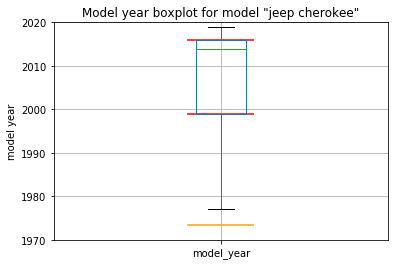


Q1 names the lower quartile, Q3 the upper quartile:
Q1 = 1999.0
Q3 = 2016.0
For the vehicles of jeep cherokee model, the oldest car has 1977 as model year
and the newest car has 2019 as model year.


In [20]:
print("I visualize the model years from this model with a boxplot:")
print()

# create seperate data frame for the example boxplot
df_jeep = df[(df['model'] == 'jeep cherokee')&(df['model_year'] > 0)]

# Q1 names the lower quartile, Q3 the upper quartileof the boxplot
Q1 = df_jeep['model_year'].quantile(0.25)
Q3 = df_jeep['model_year'].quantile(0.75)
plt.ylim(1970, 2020)
df_jeep.boxplot(column='model_year')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=[Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)], xmin=0.9, xmax=1.1, color='orange')
plt.title('Model year boxplot for model "jeep cherokee"')
plt.ylabel('model year')
plt.show()

print()
print("Q1 names the lower quartile, Q3 the upper quartile:")
print("Q1 =", Q1)
print("Q3 =", Q3)
print("For the vehicles of jeep cherokee model, the oldest car has {:.0f} as model year".format(df_jeep['model_year'].min()))
print("and the newest car has {:.0f} as model year.".format(df_jeep['model_year'].max()))

That means that the model with the biggest difference between mean and median has no outliers for its model years (the orange line in the boxplot signs the limit for outliers).That doesn't mean that the column 'model_year' has no outliers regarding the models, but having no outliers even for the model with the biggest difference between mean and median shows that outliers aren't common for model years.

In [21]:
print("The weighted mean between the medians and means of model years grouped by models is {:.1f} years,". \
      format(weighted_deviation))

The weighted mean between the medians and means of model years grouped by models is 0.8 years,


So this value is much smaller than the biggest absolute difference between mean and median grouped by models.
Also the standard deviations grouped by model decrease rapidly in the sorted table and are small for many models.
We can see that the model of a vehicle is a good indicator for filling missing model years. That's why I replace the
missing model years in the DataFrame with the corresponding median of the column 'model_year' grouped by models.

In [22]:
# I fill the median values for model years grouped by vehicle's models to the corresponding missing values
for mod in pivot_model_modelyear.index:
    df.loc[df['model'] == mod, 'model_year'] \
    = df.loc[df['model'] == mod, 'model_year'].fillna(value=pivot_model_modelyear.loc[mod, ('median', 'model_year')])

###### 5) Column 'odometer'

In [23]:
# We create again a pivot table with the conditions as index and odometer as values; analog to the pivot table I
# created for the column 'model_years':

# With minimum, maximum, standard deviation, mean and median values, we get an overview of the odometer values in this
# pivot table where the conditions create the index
pivot_cond_odometer = df.pivot_table(index='condition', values='odometer', aggfunc=['min', 'max', 'std', 'mean', 'median'])

# analog to the column 'model_year', we create helping columns for analysis
for cond in pivot_cond_odometer.index:
    pivot_cond_odometer.loc[cond, 'count'] = len(df[df['condition'] == cond])
    pivot_cond_odometer.loc[cond, 'abs_diff_mean_median'] = \
    abs(pivot_cond_odometer.loc[cond, ('median', 'odometer')] - pivot_cond_odometer.loc[cond, ('mean', 'odometer')])
    pivot_cond_odometer.loc[cond, 'missing'] = len(df[(df['condition'] == cond)&(df['odometer'].isnull())])
    pivot_cond_odometer.loc[cond, 'miss_quote'] = 100*len(df[(df['condition'] == cond)&(df['odometer'].isnull())])/ \
    len(df[df['condition'] == cond])
    pivot_cond_odometer.loc[cond, 'weight'] = abs(pivot_cond_odometer.loc[cond, ('median', 'odometer')] - \
    pivot_cond_odometer.loc[cond, ('mean', 'odometer')])*len(df[df['condition'] == cond])
weighted_mean_cond = pivot_cond_odometer['weight'].sum() / pivot_cond_odometer['count'].sum()

pivot_cond_odometer

,min,max,std,mean,median,count,abs_diff_mean_median,missing,miss_quote,weight
,odometer,odometer,odometer,odometer,odometer,,,,,
condition,,,,,,,,,,
excellent,0.0,980000.0,58121.834357,106687.682258,104230.0,24773.0,2457.682258,3800.0,15.339281,6.088416e+07
fair,0.0,500000.0,68144.412266,183062.233577,181613.0,1607.0,1449.233577,237.0,14.747978,2.328918e+06
good,0.0,990000.0,66725.844479,129919.930980,129000.0,20145.0,919.930980,3092.0,15.348722,1.853201e+07
like new,0.0,990000.0,56967.637938,79426.738166,72982.5,4742.0,6444.238166,728.0,15.352172,3.055858e+07
new,5.0,315000.0,67269.684251,43476.056000,8002.0,143.0,35474.056000,18.0,12.587413,5.072790e+06
salvage,0.0,482000.0,91356.850318,140919.989796,142673.5,115.0,1753.510204,17.0,14.782609,2.016537e+05


In [24]:
print("The weighted mean of the difference between the medians and means of odometer values grouped by conditions is {:.1f}." \
       .format(weighted_mean_cond))

The weighted mean of the difference between the medians and means of odometer values grouped by conditions is 2282.0.


In this pivot table we can see many abnormalities: <br>
The minimum odometer value for new vehicles isn't 0 as expected whereas the vehicles in conditions of lower order
have 0 miles which is also unexpected. All the maximum odometer values for different conditions are unrealistic high.
It's curious that the median value for vehicles 'like new' is already about 73.000 miles. Also for vehicles in an
'excellent' condition the median value of about 104.000 miles is unusual high. The highest fraction of vehicles is the
group of vehicles in an 'excellent' condition. The standard deviations are all very high compared to their
corresponding means. The biggest fraction of all vehicles are in the groups 'excellent' and 'good'.
Both groups have mean values that are relatively close togehter. As the weighted mean between means and
medians is not big, it seems that there are only few outliers for the odometer values. <br> <br>
It's thinkable that the odometer value corresponds to the vehicle's price and model year; for example, a cheap vehicle
that is old might driven more miles than an expensive old car etc. I will group the odometer values by prices and
model years. Let's calculate the weighted standard deviation of all standard deviations in this grouped table in order
to get an idea of the deviations from the mean values.

In [25]:
# create tables for calculating the weighted standard deviation
count_table = df.groupby(['price', 'model_year'])['odometer'].count()
std_table = df.groupby(['price', 'model_year'])['odometer'].std()
weight_table = count_table*std_table

print("The weighted standard deviation in the grouped table is {:.0f}.".format(weight_table.sum()/count_table.sum()))
# We can see that this value is smaller than all the standard deviations we had in the pivot table with the conditions
# as index. I calculate the median values of the different groups and use them to fill in the missing values.

The weighted standard deviation in the grouped table is 32694.


In [26]:
# group the odometer values by price and model years to fill in the missing values with the corresponding medians
df['odometer'] = df.groupby(['price', 'model_year'])['odometer'].apply(lambda x: x.fillna(x.median()))
print("There are {} missing values left in the column 'odometer'".format(df['odometer'].isnull().sum()))
print()
print("That's why I use the median values of odometer grouped by prices to fill in the missing values:")
# group the odometer values by price to fill in the further missing values with the corresponding medians
df['odometer'] = df.groupby('price')['odometer'].apply(lambda x: x.fillna(x.median()))
print("There are still {} missing values left in the column 'odometer'.".format(df['odometer'].isnull().sum()))
print()
print("I use the median values of odometer grouped by model years to fill in the missing values:")
# group the odometer values by model years to fill in the last missing values with the corresponding medians
df['odometer'] = df.groupby('model_year')['odometer'].apply(lambda x: x.fillna(x.median()))
print("There are {} missing values left in the column 'odometer'.".format(df['odometer'].isnull().sum()))

There are 1022 missing values left in the column 'odometer'

That's why I use the median values of odometer grouped by prices to fill in the missing values:
There are still 242 missing values left in the column 'odometer'.

I use the median values of odometer grouped by model years to fill in the missing values:
There are 0 missing values left in the column 'odometer'.


In [27]:
print("Let's check the info of our DataFrame again to see that the missing values have been filled:")
print()
df.info()

Let's check the info of our DataFrame again to see that the missing values have been filled:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


#### Conclusion

For the categorial columns ('paint_color', 'cylinders' and 'is_4wd') I found other categorial variables (model and type) for which the most common value was used to fill in missing values; determined by using pivot tables. Here, I have corrected duplicated models as we use the models for filling in missing values. <br> <br>
For the quantitative columns ('odometer' and 'model_year') I found different groups of categorial variables for filling the missing values with the corresponding median values. I used standard deviations and weigthed means for the difference between mean and median values for estimating the extent of outliers and the best categorial variables for filling in the missing values with the corresponding median values. For the column 'odometer' I worked with specific groups in the beginning ('price' and 'model_year') and used more general groups at the end for remaining missing values (only 'price' or 'model_year'). <br>
As determined in the conclusion of step 1, all columns of float64 data type had missing values. That indicates that the system proccessing the data written by Crankshaft List only accepts float values that are typed in correctly; otherwise, there is a missing value. The column 'is_4wd' could somehow not accept the value 0 in their system. The column 'paint_color' maybe wasn't easy to determine for some vehicles and they wanted to avoid many more different colors in their advertisements since this could be confusing for the customers.

<a id="2.2"></a>

### 2.2) Convert data and find duplicates

###### Convert Data

In [28]:
print("Let's look again at the different data types in the DataFrame's info:")
print()
df.info()

Let's look again at the different data types in the DataFrame's info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


For the columns 'model_year', 'cylinders', 'odometer' and 'is_4wd' in the float64 data type it makes sense to convert them into the int64 data type. The odometer values are big enough to neglect effect by rounding. The other columns can't have have half numbers.

In [29]:
# all the float64 data typed columns will be transformed to int64 data typed columns; try and except to see if there are errors
try:
    df['cylinders'] = df['cylinders'].astype('int')
except:
    print("Couldn't transform the column 'cylinders' into int64 type.")
try:
    df['is_4wd'] = df['is_4wd'].astype('int')
except:
    print("Couldn't transform the column 'is_4wd' into int64 type.")
try:
    df['model_year'] = df['model_year'].astype('int')
except:
    print("Couldn't transform the column 'model_year' into int64 type.")   
try:
    df['odometer'] = df['odometer'].astype('int')
except:
    print("Couldn't transform the column 'odometer' into int64 type.") 

In [30]:
print("Let's check our conversions in the DataFrame's info:")
print()
df.info()

Let's check our conversions in the DataFrame's info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int32
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int32
fuel            51525 non-null object
odometer        51525 non-null int32
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null int32
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: int32(4), int64(2), object(7)
memory usage: 4.3+ MB


###### Find Duplicates

In [31]:
# It was necessary to correct the duplicated models in the section 'Identify and fill in the missing values'
# as I used the models for filling in the missing values.

print("There are {} duplicates in our DataFrame.".format(df.duplicated().sum()))

There are 0 duplicates in our DataFrame.


#### Conclusion

We had a table with no missing values. From the beginning it already had int64 columns. For the other columns in float64 data types, it didn't make sense to allow half numbers ('model_year', 'cylinders' and 'is_4wd') or the rounding effects are negligible ('odometer'). As we had no missing values, the most easy method to transform whole columns is the astype() method. With the use of try and except cases I could see if there is an error. <br>
After converting the data types in the columns and correcting duplicated models, we found 0 duplicates in our DataFrame.

<a id="2.3"></a>

### 2.3) Further calculations in the table

In [32]:
print("The column 'date_posted' gets converted into the datetime64 data type.")
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')

The column 'date_posted' gets converted into the datetime64 data type.


In [33]:
print("The column 'weekday_posted' gives us the day in the week of the vehicle when the ad was posted.")
df['weekday_posted'] = df['date_posted'].dt.weekday

The column 'weekday_posted' gives us the day in the week of the vehicle when the ad was posted.


In [34]:
print("The column 'year_posted' gives us the year of the vehicle when the ad was posted.")
df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year

The column 'year_posted' gives us the year of the vehicle when the ad was posted.


In [35]:
print("The column 'month_posted' gives us the month of the year of the vehicle when the ad was posted.")
df['month_posted'] = pd.DatetimeIndex(df['date_posted']).month

The column 'month_posted' gives us the month of the year of the vehicle when the ad was posted.


In [36]:
print("The column 'age_when_posted' gives us the age of the vehicle when the ad was posted.")
df['age_when_posted'] = abs(df['year_posted'] - df['model_year'])

The column 'age_when_posted' gives us the age of the vehicle when the ad was posted.


In [37]:
print("I change the ages that are zero to one as we need the mileage per year and we can't divide by zero.")
df['age_when_posted'] = df['age_when_posted'].replace(0, 1)

I change the ages that are zero to one as we need the mileage per year and we can't divide by zero.


In [38]:
print("The column 'mileage_per_year' gives us the average mileage of the vehicle per year.")
df['mileage_per_year'] = df['odometer'] / df['age_when_posted']

The column 'mileage_per_year' gives us the average mileage of the vehicle per year.


In [39]:
print("Here it's also better to transform the column 'mileage_per_year' into int64 data type.")
try:
    df['mileage_per_year'] = df['mileage_per_year'].astype('int')
except:
    print("Couldn't transform the column 'mileage_per_year' into int64 type.")   

Here it's also better to transform the column 'mileage_per_year' into int64 data type.


In [40]:
print("We replace the strings in the column 'condition' with the following integers:")
print("new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0")
df['condition'] = df['condition'].replace({'new' : 5, 'like new' : 4, 'excellent' : 3, 'good' : 2, 'fair' : 1, 'salvage' : 0})

We replace the strings in the column 'condition' with the following integers:
new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0


In [41]:
# Let's look at the added columns in the DataFrame's head:

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,1,2018-06-23,19,5,2018,6,7,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,7,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,6,18333
3,1500,2003,ford f-150,1,8,gas,160000,automatic,pickup,white,0,2019-03-22,9,4,2019,3,16,10000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2,40451


#### Conclusion

The column 'date_posted' had to be transformed into the datetime64 type since it's then much more easy to get the demanded columns by using the DatetimeIndex() method. For creating the column 'mileage_per_year', I had to divide the columns 'odometer' and 'age_when_posted', where the second column can't have 0 as age since dividing by zero isn't possible. So, the age 0 is replaced with the age 1. It makes sense to transform the condition objects into integers since the condition of a vehicle has a fluent transition from 'new' to 'salvage'. Later in the analysis, we can then treat the values in the condition column as numbers and not as objects.

<a id="3"></a>

## 3) Exploratory data analysis

<a id="3.1"></a>

### 3.1) Price, vehicle's age, mileage, number of cylinders and condition

Plot histograms for each of these parameters: Price, vehicle's age when the ad was placed, mileage, number of cylinders and condition. Study how outliers affect the form and readability of the histograms.
Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

###### 1) Column 'price'

In [42]:
print("Lowest value for 'price' in DataFrame:", df['price'].min())
print("Highest value for 'price' in DataFrame:", df['price'].max())

Lowest value for 'price' in DataFrame: 1
Highest value for 'price' in DataFrame: 375000


Histogram 1:


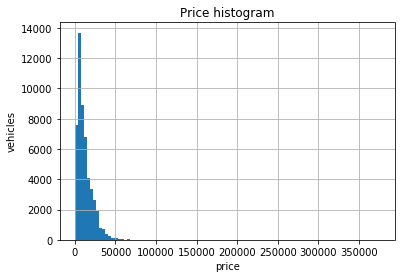

In [43]:
print("Histogram 1:")
df.hist('price', bins = 100)
plt.title('Price histogram')
plt.xlabel('price')
plt.ylabel('vehicles')
plt.show()

Boxplot 1:


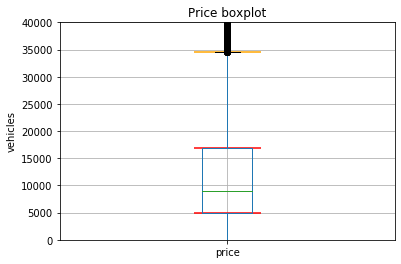

Value where the outliers begin regarding the boxplot: 34598 (orange line in plot)


In [44]:
print("Boxplot 1:")
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
plt.ylim(0, 40000)
df.boxplot(column='price')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=[Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)], xmin=0.9, xmax=1.1, color='orange')
plt.title('Price boxplot')
plt.ylabel('vehicles')
plt.show()
print("Value where the outliers begin regarding the boxplot: {:.0f} (orange line in plot)".format(Q3+1.5*(Q3-Q1)))

Histogram 2 in the range between 20.000 and 50.000:


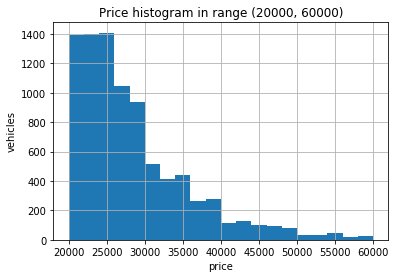

In [45]:
print("Histogram 2 in the range between 20.000 and 50.000:")
df.hist('price', bins = 20, range = (20000, 60000))
plt.title('Price histogram in range (20000, 60000)')
plt.xlabel('price')
plt.ylabel('vehicles')
plt.show()

Histogram 1 showing the whole distribution of the prices indicates a tight curve that starts with a high
amount of vehicles around 0, reaches fastly its highest point at approx. 10.000 and flattens out in a big range of
prices until 375000 Dollars. <br> <br>
Histogram 2 showing the range between 20.000 and 50.000 indicates a big decrease at 30.000. There's another
decrease at 35.000 which is approximately the value for outliers out from the boxplot 1 for the column 'price'. As we
have another decrease at 40.000, we set the value for outliers at 40.000. <br> <br>
This means we sort out all vehicles that have prices more than 40.000.

###### 2) Column 'age_when_posted'

In [46]:
print("Minimum value in the column 'age_when_posted':", df['age_when_posted'].min())
print("Maximum value in the column 'age_when_posted':", df['age_when_posted'].max())

Minimum value in the column 'age_when_posted': 1
Maximum value in the column 'age_when_posted': 110


Histogram 3:


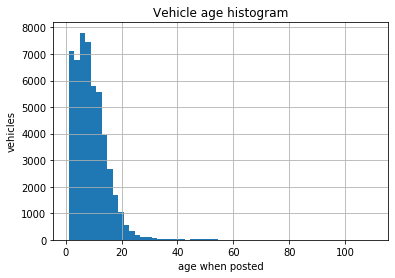

In [47]:
print("Histogram 3:")
df.hist('age_when_posted', bins = 55)
plt.title('Vehicle age histogram')
plt.xlabel('age when posted')
plt.ylabel('vehicles')
plt.show()

Boxplot 2:


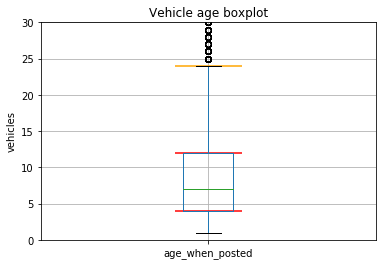

Value where the outliers begin regarding the boxplot: 24 (orange line in plot)


In [48]:
print("Boxplot 2:")
Q1 = df['age_when_posted'].quantile(0.25)
Q3 = df['age_when_posted'].quantile(0.75)
plt.ylim(0, 30)
df.boxplot(column='age_when_posted')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=[Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)], xmin=0.9, xmax=1.1, color='orange')
plt.title('Vehicle age boxplot')
plt.ylabel('vehicles')
plt.show()
print("Value where the outliers begin regarding the boxplot: {:.0f} (orange line in plot)".format(Q3+1.5*(Q3-Q1)))

Histogram 4 in the range between 20 and 40:


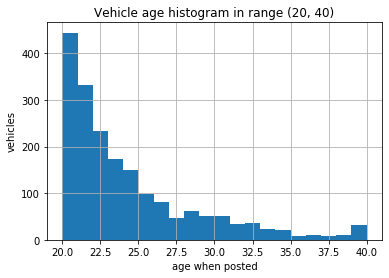

In [49]:
print("Histogram 4 in the range between 20 and 40:")
df.hist('age_when_posted', bins = 20, range = (20, 40))
plt.title('Vehicle age histogram in range (20, 40)')
plt.xlabel('age when posted')
plt.ylabel('vehicles')
plt.show()

Histogram 3 showing the whole distribution of the column 'age_when_posted' starts with a very high value for vehicles
aged 1 or 2 years. Fastly it reaches its maximum at ca. 7 years and it also fastly decreases until ca. 30 years.
From there on, a big range until 110 years filled with outliers begins. <br> <br>
Histogram 4 showing the distribution between 20 and 40 years indicates a decreasing trend until 28 years. This value
is not far away from the value for outliers regarding boxplot 2 (24 years). Consequently, all vehicles older than 28
years will be filtered out from the DataFrame.

###### 3) Column 'mileage_per_year'

In [50]:
print("Minimum value in the column 'mileage_per_year':", df['mileage_per_year'].min())
print("Maximum value in the column 'mileage_per_year':", df['mileage_per_year'].max())

Minimum value in the column 'mileage_per_year': 0
Maximum value in the column 'mileage_per_year': 373200


Histogram 5:


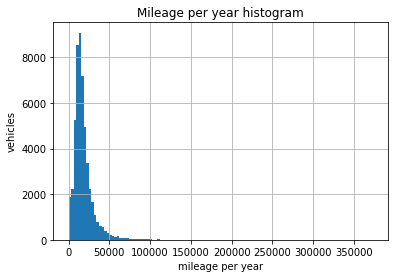

In [51]:
print("Histogram 5:")
df.hist('mileage_per_year', bins = 120)
plt.title('Mileage per year histogram')
plt.xlabel('mileage per year')
plt.ylabel('vehicles')
plt.show()

Boxplot 3:


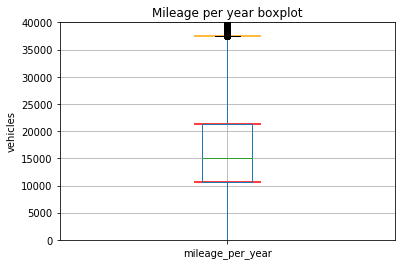

Value where the outliers begin regarding the boxplot: 37459 (orange line in plot)


In [52]:
print("Boxplot 3:")
Q1 = df['mileage_per_year'].quantile(0.25)
Q3 = df['mileage_per_year'].quantile(0.75)
plt.ylim(0, 40000)
df.boxplot(column='mileage_per_year')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=[Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)], xmin=0.9, xmax=1.1, color='orange')
plt.title('Mileage per year boxplot')
plt.ylabel('vehicles')
plt.show()
print("Value where the outliers begin regarding the boxplot: {:.0f} (orange line in plot)".format(Q3+1.5*(Q3-Q1)))

Histogram 6 in the range between 30.000 and 60.000:


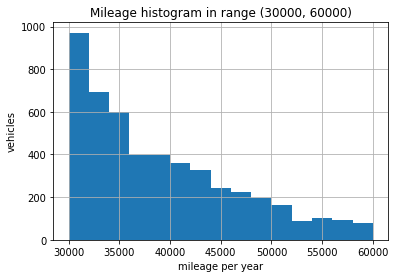

In [53]:
print("Histogram 6 in the range between 30.000 and 60.000:")
df.hist('mileage_per_year', bins = 15, range = (30000, 60000))
plt.title('Mileage histogram in range (30000, 60000)')
plt.xlabel('mileage per year')
plt.ylabel('vehicles')
plt.show()

Histogram 5 indicates a curve that starts with a value of 2000 right at 0 mileages per year and increases rapidly
until the curve reaches its maximum at ca. 15.000 miles per year. After that, there's a fast decrease that flattens
out at ca. 70.000 miles per year. The range reaches 373.200 miles per year. <br> <br>
Histogram 6 shows a decreasing trend in the range between 30.000 and 55.000 miles per year. At ca. 36.000 miles per
year, there's a fast decrease followed by a slow decrease. As the value for outliers is 37.459 regarding boxplot 3
I will use that value. So, all vehicles with an value for mileage per year higher than 37.459 will be sorted out.

###### 4) Column 'condition'

Bar chart 7 of the column 'condition:'


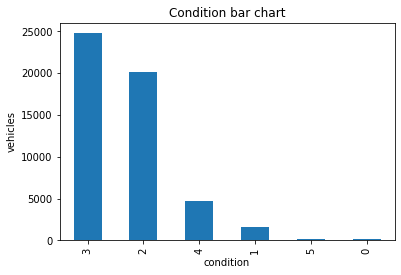

In [54]:
print("Bar chart 7 of the column 'condition:'")
df['condition'].value_counts().plot(kind='bar')
plt.title('Condition bar chart')
plt.xlabel('condition')
plt.ylabel('vehicles')
plt.show()

The two conditions most common are 'excellent' (= 3) and 'good' (= 2).

Histogram 8 of the column 'odometer' for all vehicles with the condition 'new' (= 5):


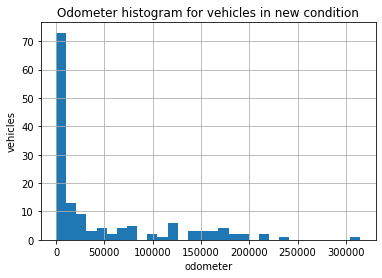

In [55]:
print("Histogram 8 of the column 'odometer' for all vehicles with the condition 'new' (= 5):")
df_new = df.query('condition == 5')
df_new.hist('odometer', bins = 30)
plt.title('Odometer histogram for vehicles in new condition')
plt.xlabel('odometer')
plt.ylabel('vehicles')
plt.show()

Usually, new vehicles don't have high odometer values. This can be obsverved in Histogram 7 where the highest amount
of vehicles have less than 10.000 miles. I sort out all vehicles in new condition that have more than 10.000 miles.

Histogram 9 of the column 'odometer' for all vehicles that have not the condition 'new':


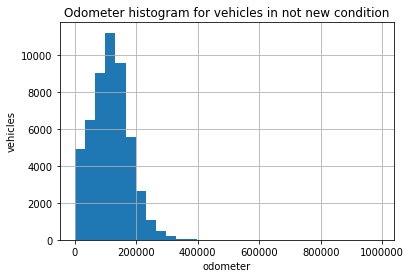

In [56]:
print("Histogram 9 of the column 'odometer' for all vehicles that have not the condition 'new':")
df_not_new = df.query('condition != 5')
df_not_new.hist('odometer', bins = 30)
plt.title('Odometer histogram for vehicles in not new condition')
plt.xlabel('odometer')
plt.ylabel('vehicles')
plt.show()

Boxplot 4:


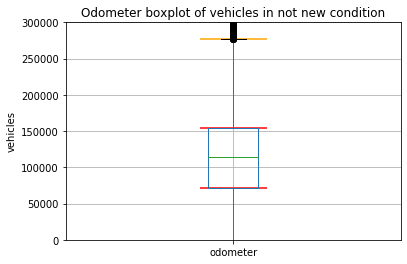

Value where the outliers begin regarding the boxplot: 277000 (orange line in plot)


In [57]:
print("Boxplot 4:")
Q1 = df_not_new['odometer'].quantile(0.25)
Q3 = df_not_new['odometer'].quantile(0.75)
plt.ylim(0, 300000)
df_not_new.boxplot(column='odometer')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=[Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)], xmin=0.9, xmax=1.1, color='orange')
plt.title('Odometer boxplot of vehicles in not new condition')
plt.ylabel('vehicles')
plt.show()
print("Value where the outliers begin regarding the boxplot: {:.0f} (orange line in plot)".format(Q3+1.5*(Q3-Q1)))

I use the highest value for outliers (277.000 miles) for sorting out vehicles with an odometer value higher than this.

###### 5) Column 'cylinders'

Bar chart for the column 'cylinders':


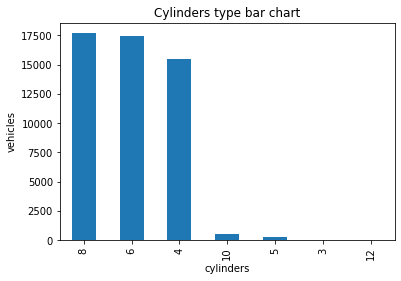

There are vehicles with 3, 5, 10 and 12 cylinders. Their quotes are very low, but such vehicles are exisiting,
so here are no hints for sorting out data.


In [58]:
print("Bar chart for the column 'cylinders':")
df['cylinders'].value_counts().plot(kind='bar')
plt.title('Cylinders type bar chart')
plt.xlabel('cylinders')
plt.ylabel('vehicles')
plt.show()
print("There are vehicles with 3, 5, 10 and 12 cylinders. Their quotes are very low, but such vehicles are exisiting,")
print("so here are no hints for sorting out data.")

In [59]:
# Here we execute all the determined conditions using the query() method:
# df_rejected includes only the rows of df that are sorted out corresponding to the conditions
# df_filtered includes only the rows of df that we want to include corresponding to the conditions
df_rejected = df.query('price > 40000 or age_when_posted > 28 or mileage_per_year > 37459 or \
                        (condition == 5 and odometer > 10000) or (condition != 5 and odometer > 277000)')
df_filtered = df.query('price <= 40000 and age_when_posted <= 28 and mileage_per_year <= 37459 and \
                      ((condition == 5 and odometer <= 10000) or (condition != 5 and odometer <= 277000))')

#### Conclusion

For the quantitative columns, the outliers expanded the x-axis bigly. After sorting out the outliers, one could see the indicated shapes of the histograms much better since the x-axis had a much smaller range. Here, I treated the column 'condition' as categorial since one can't assert that the conditions with small qoutes are outliers. The condition 'new' is special as its odometer values had abnormalities. A new vehicle shouldn't be driven too much, so here the outliers could be determined by a histogram of the 'odometer' values. The categorial variable 'cylinders' showed that the 4, 6 and 8 typed cylinders are much more common than the other cylinders types.

<a id="3.2"></a>

### 3.2) Histogram comparison: Before and after filtering

Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

##### Column 'price'


Before filtering:


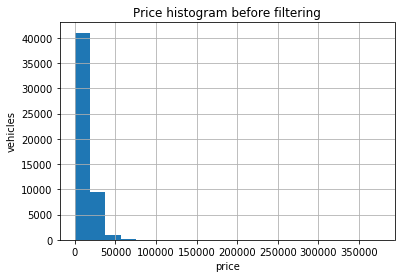

After filtering:


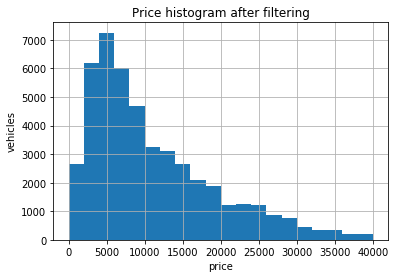

Conclusion:

Since the range of the x-axis has been thinned very much after filtering the outliers one can see the decreasing
trend much better. The filtered histogram indicates a right skewed distribution of prices with the maximum at 5000.


In [60]:
##### Column 'price'


print("##### Column 'price'")
print()
print()
print("Before filtering:")
df.hist('price', bins = 20)
plt.title('Price histogram before filtering')
plt.xlabel('price')
plt.ylabel('vehicles')
plt.show()
print("After filtering:")
df_filtered.hist('price', bins = 20)
plt.title('Price histogram after filtering')
plt.xlabel('price')
plt.ylabel('vehicles')
plt.show()
print("Conclusion:")
print()
print("Since the range of the x-axis has been thinned very much after filtering the outliers one can see the decreasing")
print("trend much better. The filtered histogram indicates a right skewed distribution of prices with the maximum at 5000.")

##### Column 'age_when_posted'


Before filtering:


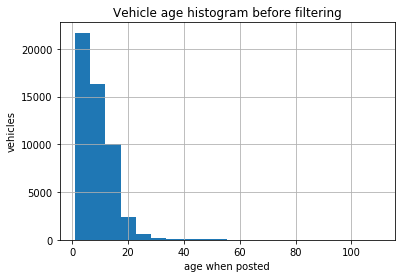

After filtering:


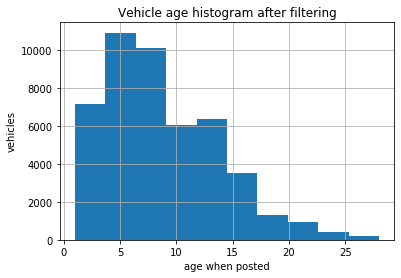

Conclusion:

Before filtering, the histogram indicated a decreasing trend right from the beginning. After filtering the outliers,
one could see that the distribution reaches its maximum at 5 years.


In [61]:
##### Column 'age_when_posted'


print("##### Column 'age_when_posted'")
print()
print()
print("Before filtering:")
df.hist('age_when_posted', bins = 20)
plt.title('Vehicle age histogram before filtering')
plt.xlabel('age when posted')
plt.ylabel('vehicles')
plt.show()
print("After filtering:")
df_filtered.hist('age_when_posted', bins = 10)
plt.title('Vehicle age histogram after filtering')
plt.xlabel('age when posted')
plt.ylabel('vehicles')
plt.show()
print("Conclusion:")
print()
print("Before filtering, the histogram indicated a decreasing trend right from the beginning. After filtering the outliers,")
print("one could see that the distribution reaches its maximum at 5 years.")

##### Column 'mileage_per_year'


Before filtering:


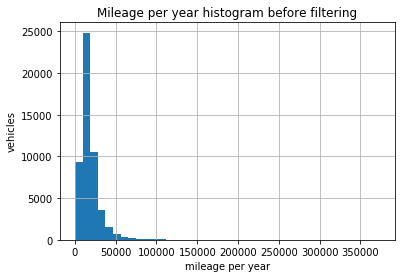

After filtering:


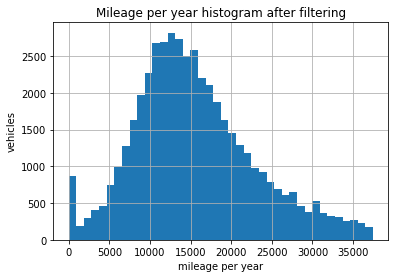

Conclusion:

The unfiltered histogram has a range in the x-axis that is 10 times bigger than the range of the filtered histogram.
So, we can see a much more detailered distribution that is slightly right skewed and has its maximum at ca. 12000.
Right at the beginning around 0, we have abnormally many vehicles; the reason for that might be that there are more
vehicles that haven't been driven much yet and also might be older, so they have small values for 'mileage_per_year.


In [62]:
##### Column 'mileage_per_year'


print("##### Column 'mileage_per_year'")
print()
print()
print("Before filtering:")
df.hist('mileage_per_year', bins = 40)
plt.title('Mileage per year histogram before filtering')
plt.xlabel('mileage per year')
plt.ylabel('vehicles')
plt.show()
print("After filtering:")
df_filtered.hist('mileage_per_year', bins = 40)
plt.title('Mileage per year histogram after filtering')
plt.xlabel('mileage per year')
plt.ylabel('vehicles')
plt.show()
print("Conclusion:")
print()
print("The unfiltered histogram has a range in the x-axis that is 10 times bigger than the range of the filtered histogram.")
print("So, we can see a much more detailered distribution that is slightly right skewed and has its maximum at ca. 12000.")
print("Right at the beginning around 0, we have abnormally many vehicles; the reason for that might be that there are more")
print("vehicles that haven't been driven much yet and also might be older, so they have small values for 'mileage_per_year.")

##### Column 'odometer'


Before filtering:


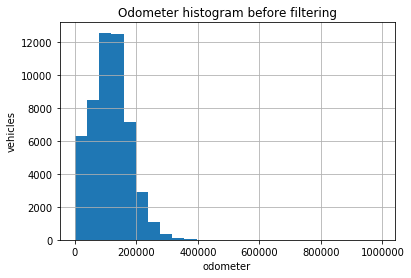

After filtering:


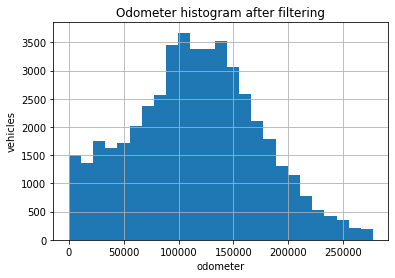

Conclusion:

Here, the filtering process indicated a more detailered distribution of the odometer values. Here it's special that
right from the beginning, the distribution starts with a high value that has an increasing trend.


In [63]:
##### Column 'odometer'


print("##### Column 'odometer'")
print()
print()
print("Before filtering:")
df.hist('odometer', bins = 25)
plt.title('Odometer histogram before filtering')
plt.xlabel('odometer')
plt.ylabel('vehicles')
plt.show()
print("After filtering:")
df_filtered.hist('odometer', bins = 25)
plt.title('Odometer histogram after filtering')
plt.xlabel('odometer')
plt.ylabel('vehicles')
plt.show()
print("Conclusion:")
print()
print("Here, the filtering process indicated a more detailered distribution of the odometer values. Here it's special that")
print("right from the beginning, the distribution starts with a high value that has an increasing trend.")

#### Conclusion

In general, the consequences of filtering outliers are multiple: <br>
You can see a much more detailered distribution since the x-axis gets a smaller range after filtering.
Hence you can observe abnormalities and skewness of the curves much better.
You can also estimate important points much better, for example the maximum.

<a id="3.3"></a>

### 3.3) Study of the advertisements

Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

Histogram for the column 'days_listed':


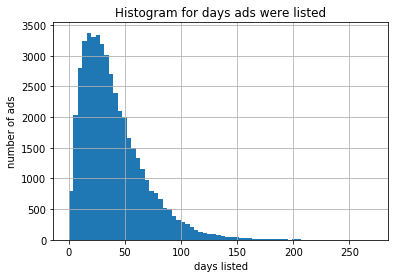

Description of the column 'days_listed':

count    46784.000000
mean        39.534264
std         28.237753
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


In [64]:
print("Histogram for the column 'days_listed':")
df_filtered.hist('days_listed', bins = 68)
plt.title('Histogram for days ads were listed')
plt.xlabel('days listed')
plt.ylabel('number of ads')
plt.show()
print("Description of the column 'days_listed':")
print()
print(df_filtered['days_listed'].describe())

The histogram indicates a right skewed distribution starting with a high value at 0 days listed and increasing fastly until it reaches its maximum at approx. 20 days listed. At 200 days, the number of vehicles tends to 0. As this distribution is right skewed, the maximum is smaller than the median and the mean. The first quantile (25%) and the third quantile (75%) show that a typical lifetime of an ad has a range between 19 and 53 days.

We use a boxplot for finding the outliers:


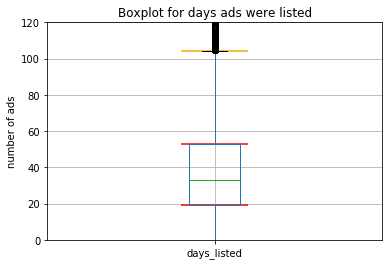

Value where the outliers begin regarding the boxplot: 104 (orange line in plot)


In [65]:
print("We use a boxplot for finding the outliers:")
Q1 = df_filtered['days_listed'].quantile(0.25)
Q3 = df_filtered['days_listed'].quantile(0.75)
plt.ylim(0, 120)
df_filtered.boxplot(column='days_listed')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=[Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)], xmin=0.9, xmax=1.1, color='orange')
plt.title('Boxplot for days ads were listed')
plt.ylabel('number of ads')
plt.show()
print("Value where the outliers begin regarding the boxplot: {:.0f} (orange line in plot)".format(Q3+1.5*(Q3-Q1)))

Histogram in the range 80 to 200 days listed:


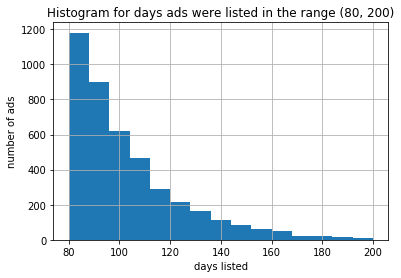

In [66]:
print("Histogram in the range 80 to 200 days listed:")
df_filtered.hist('days_listed', bins = 15, range = (80, 200))
plt.title('Histogram for days ads were listed in the range (80, 200)')
plt.xlabel('days listed')
plt.ylabel('number of ads')
plt.show()

In the second histogram showing the range of 80 and 200 days listed one can observe that the decreasing trend flattens out at approx. 110 days; the reduced decreasing trend continues until approx. 170 days. From there on, there is a small line that indicates to be more or less constant. Consequently, one can assert that the value where abnormally long lifetimes for ads begin is given by the boxplot indicating a value of 104 days. The quickly removed ads accumulates in the range of 0 and 19 days (first quartile) where one can observe a big increasing trend in the histogram.

#### Conclusion

As given in the description of the histograms above, one can assume that the given values by the boxplot are accurate for determining outliers in the distribution; it indicates a value of 104 days from where on the definition of abnormally long listed advertisements is given. Since the increasing trend in the first histogram is very fast, there are many vehicles whose ad was removed quickly. I think regarding the right skewed distribution it's appropriate to set the lower quartile as the value where quickly removed ads ends: 19 days. For the first histogram, the mean is 39.5 days and the median is 33 days.

<a id="3.4"></a>

### 3.4) The number of ads and the average price for each type of vehicle

Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In the following table, the column 'number of ads' gives the number of advertisements per vehicle's type and is
determined by counting the number of vehicles for every type. The column 'mean price' gives the mean value of all
vehicle's prices that have the type corresponding to the row.

             number of ads    mean price
type                                    
bus                     24  17135.666667
offroad                197  13691.147208
other                  227  10154.277533
convertible            372  12429.397849
van                    580  10225.670690
hatchback              965   6577.745078
mini-van              1068   7616.905431
wagon                 1460   8787.983562
coupe                 2033  13442.020167
pickup                6221  15113.824948
truck                10816  15308.970692
sedan                11294   6715.443864
SUV                  11527  10414.511755

The following bar chart visualizes these two parameters sorted by mean prices:


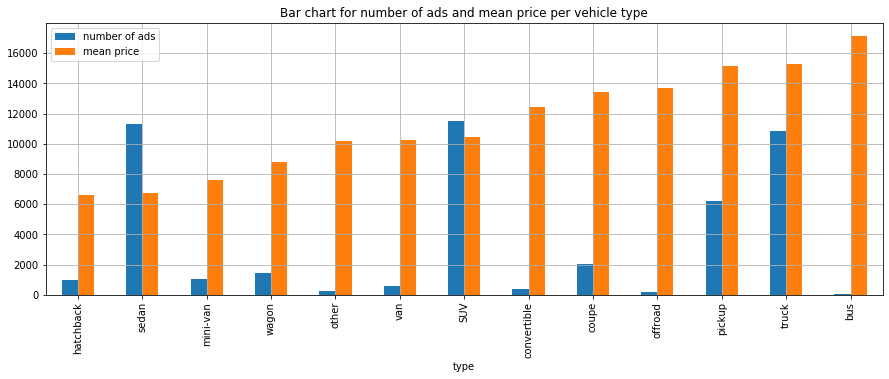

When sorting the mean prices in the bar chart, one can observe that from type to type the mean prices differ - from
6578 for hatchbacks to 17.136 for buses. The increase of the mean price from type to type within this range look alike
a linear increase. Looking at the blue bars for number of ads, one can assert than this linearity isn't given for this
parameter since there are four manifested main types with high number of ads:
SUV with 11527 ads, sedan with 11294 ads, truck with 10816 ads and pickup with 6221 ads.

The two types with the highest number of ads are SUV and sedan.


In [67]:
print("In the following table, the column 'number of ads' gives the number of advertisements per vehicle's type and is")
print("determined by counting the number of vehicles for every type. The column 'mean price' gives the mean value of all")
print("vehicle's prices that have the type corresponding to the row.")
print()
# create a pivot table with type as index and columns 'number of ads' and 'mean price' where number of ads equals the number of 
# vehicles of the corresponding type
type_ads_meanprice = df_filtered.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
type_ads_meanprice.columns = ['number of ads', 'mean price']
print(type_ads_meanprice.sort_values('number of ads'))
print()
print("The following bar chart visualizes these two parameters sorted by mean prices:")
type_ads_meanprice.sort_values('mean price') \
                  .plot(kind='bar', grid = True, figsize = (15, 5))
plt.title('Bar chart for number of ads and mean price per vehicle type')
plt.show()
print("When sorting the mean prices in the bar chart, one can observe that from type to type the mean prices differ - from")
print("6578 for hatchbacks to 17.136 for buses. The increase of the mean price from type to type within this range look alike")
print("a linear increase. Looking at the blue bars for number of ads, one can assert than this linearity isn't given for this")
print("parameter since there are four manifested main types with high number of ads:")
print("SUV with 11527 ads, sedan with 11294 ads, truck with 10816 ads and pickup with 6221 ads.")
print()
print("The two types with the highest number of ads are SUV and sedan.")

# I create two seperate DataFrames for Sedans and SUVs for the next task
df_suv = df_filtered.query('type == "SUV"')
df_sedan = df_filtered.query('type == "sedan"')

#### Conclusion

We found a dependency between the type of a vehicle and its mean price. The difference between the smallest and the biggest mean price according to the vehicle's types is approx. 10.000. Such a dependency couldn't be found for the number of ads which was calculated by counting the number of vehicles that are from the corresponding type since every vehicle was listed. Here, we could find four types that have significantly the most ads: SUV with 11527 ads, sedan with 11294 ads, truck with 10816 ads and pickup with 6221 ads.

<a id="3.5"></a>

### 3.5) Factors that impact the price most

What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether 
the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type
and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, 
note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

###### Analysis for the type 'SUV'

######## Analysis for the type 'SUV'


#### 'age_when_posted' and 'price':


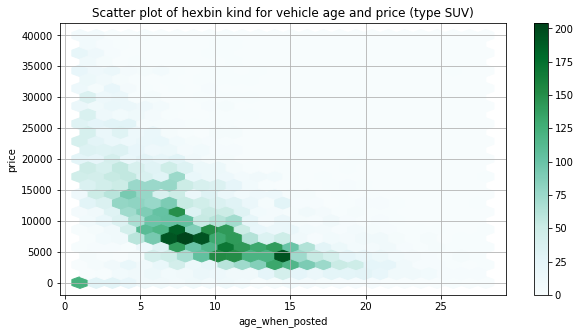

Correlation coefficient: -0.5679085449943224


In [68]:
######## Analysis for the type 'SUV'


print("######## Analysis for the type 'SUV'")
print()
print()

#### 'age_when_posted' and 'price'

print("#### 'age_when_posted' and 'price':")

# Here I use the hexbin plot as the scatter plot is full of points where one can't see the values with more or less values
df_suv.plot(x='age_when_posted', y='price', kind='hexbin', sharex=False, grid=True, gridsize=25, figsize=(10,5))
plt.title('Scatter plot of hexbin kind for vehicle age and price (type SUV)')
plt.show()

print("Correlation coefficient:", df_suv['age_when_posted'].corr(df_suv['price']))

#### 'mileage_per_year' and 'price':




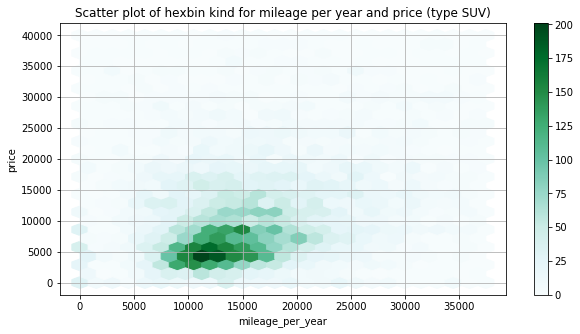

Correlation coefficient: 0.22771421490949623


In [69]:
#### 'mileage_per_year' and 'price'

print("#### 'mileage_per_year' and 'price':")
print()
print()

# Here the same reason as above for using the hexbin kind
df_suv.plot(x='mileage_per_year', y='price', kind='hexbin', sharex=False, grid=True, gridsize=25, figsize=(10,5))
plt.title('Scatter plot of hexbin kind for mileage per year and price (type SUV)')
plt.show()

print("Correlation coefficient:", df_suv['mileage_per_year'].corr(df_suv['price']))

#### 'condition' and 'price':




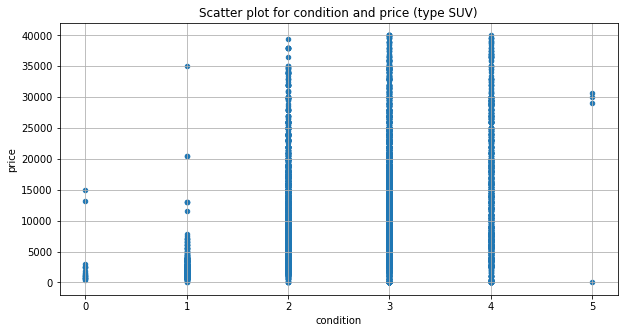

Correlation coefficient: 0.2769839186992352


In [70]:
#### 'condition' and 'price'

print("#### 'condition' and 'price':")
print()
print()

df_suv.plot(x='condition', y='price', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for condition and price (type SUV)')
plt.show()

print("Correlation coefficient:", df_suv['condition'].corr(df_suv['price']))

#### 'paint_color' and 'price':


We group the vehicles by color and for each color we sort out the vehicles with less than 50 ads since they're not
valid for the analysis. In the following table are the colors with less than 50 counted values:

             price
paint_color       
purple          38
yellow          46

The vehicles in the colors 'yellow' and 'purple' will be filtered out for this analysis.

The following plot box-and-whisker charts show boxplots for each color:


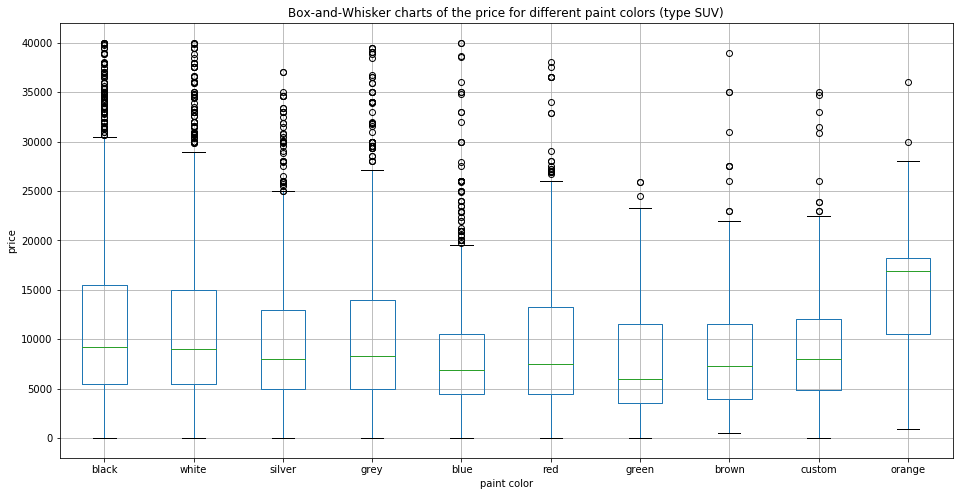

In [71]:
#### 'paint_color' and 'price'

print("#### 'paint_color' and 'price':")
print()
print()
print("We group the vehicles by color and for each color we sort out the vehicles with less than 50 ads since they're not")
print("valid for the analysis. In the following table are the colors with less than 50 counted values:")
print()
# create a table with the colors that must be sorted out as they have less than 50 prices
print(df_suv.pivot_table(index='paint_color', values='price', aggfunc='count').query('price < 50'))
print()
print("The vehicles in the colors 'yellow' and 'purple' will be filtered out for this analysis.")
print()
print("The following plot box-and-whisker charts show boxplots for each color:")

# filter out the corresponding colors in our df and safe it as a new df
df_suv_color = df_suv.query('paint_color != "yellow" and paint_color != "purple"')

# create multiple new columns in our df so it's easy to create one graph with all boxplots included
# Each column is a paint color and has the price value for each vehicle in the corresponding column; all the other columns
# in that corresponding row have NaN values
colors = df_suv_color['paint_color'].value_counts().index
for color in colors:
    for i in df_suv_color.index:
        if df_suv_color.loc[i, 'paint_color'] == color:
            df_suv_color.loc[i, color] = df_suv_color.loc[i, 'price']

# The list 'colors' includes all colors that we have included for our analysis
df_suv_color.boxplot(column=[colors[0], colors[1], colors[2], colors[3], colors[4], colors[5], colors[6], \
                             colors[7], colors[8], colors[9]], figsize=(16, 8))
plt.title('Box-and-Whisker charts of the price for different paint colors (type SUV)')
plt.xlabel('paint color')
plt.ylabel('price')
plt.show()

One can see quickly that all colors have outliers regarding the prices. Besides the color 'orange', all medians for each color are located in the range between 5000 and 10.000. The lower quartile for the color 'orange' is even higher than 10.000, so this color stands out.

#### 'transmission' and 'price':


I group the vehicles by transmission and for each type I sort out the vehicles with less than 50 ads since they're not
valid for the analysis. In the following table are the transmissions with less than 50 counted values:

Empty DataFrame
Columns: [price]
Index: []

There are no transmission types to sort out from our data.

The following plot box-and-whisker charts show boxplots for each transmission type:


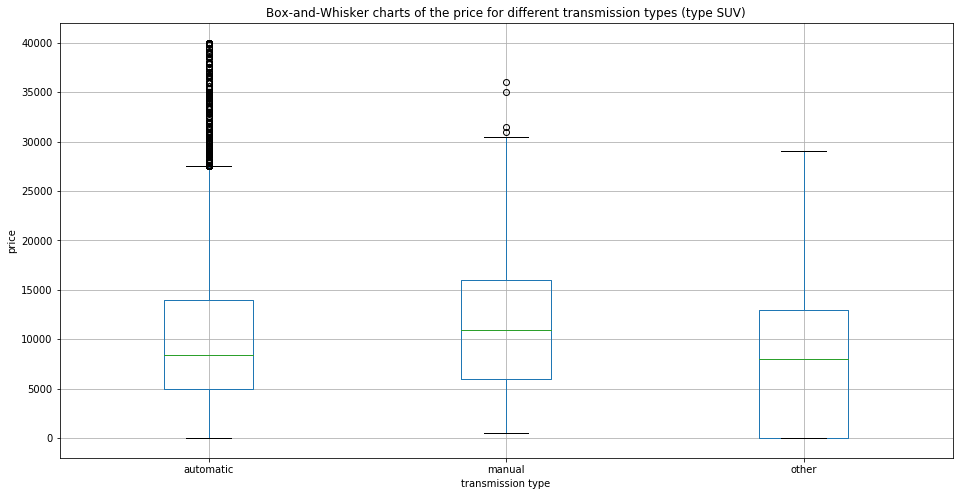

Description of the prices with the transmission type 'other':

count      139.000000
mean      8207.294964
std       7552.355441
min          1.000000
25%          1.000000
50%       7995.000000
75%      12925.000000
max      28999.000000
Name: other, dtype: float64


In [72]:
#### 'transmission' and 'price'

print("#### 'transmission' and 'price':")
print()
print()
print("I group the vehicles by transmission and for each type I sort out the vehicles with less than 50 ads since they're not")
print("valid for the analysis. In the following table are the transmissions with less than 50 counted values:")
print()
# create a table with the transmission types that must be sorted out as they have less than 50 prices
print(df_suv.pivot_table(index='transmission', values='price', aggfunc='count').query('price < 50'))
print()
print("There are no transmission types to sort out from our data.")
print()
print("The following plot box-and-whisker charts show boxplots for each transmission type:")

# safe the added columns to another df
df_suv_transm = df_suv

# analog to above: create a column for each transmission type and create a graph with all boxplots included
transmissions = df_suv_transm['transmission'].value_counts().index
for transm in transmissions:
    for i in df_suv_transm.index:
        if df_suv_transm.loc[i, 'transmission'] == transm:
            df_suv_transm.loc[i, transm] = df_suv_transm.loc[i, 'price']

# The list 'transmissions' includes all transmission types that we have included for our analysis
df_suv_transm.boxplot(column=[transmissions[0], transmissions[1], transmissions[2]], figsize=(16, 8))
plt.title('Box-and-Whisker charts of the price for different transmission types (type SUV)')
plt.xlabel('transmission type')
plt.ylabel('price')
plt.show()

print("Description of the prices with the transmission type 'other':")
print()
print(df_suv_transm['other'].describe())

The only two transmission types with outliers are 'automatic' and 'manual'. Both types have outliers compared to the type 'other'. Both types, 'automatic' and 'manual', have similar boxplots. The Boxplot for the type 'other' differs since the lower quartile and the minimum have the exact same value of 1. That means that some vehicles with that transmission type are almost for free. Comparing its upper quartile with the one from 'automatic' type one can see that they're similar as well as their medians. That means that the vehicles from 'other' transmission type assimilates the price range of the 'automatic' transmission type for prices at the median and at the upper quartile.

###### Analysis for the type 'sedan'

######## Analysis for the type 'sedan'


#### 'age_when_posted' and 'price':


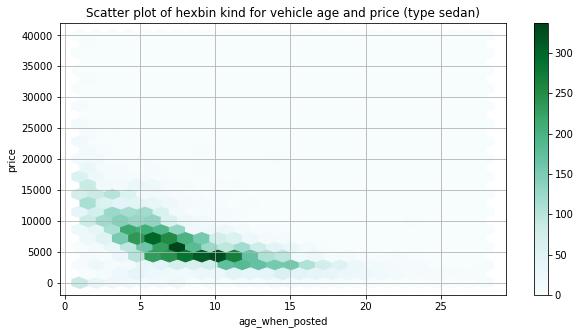

Correlation coefficient: -0.601517575002519


In [73]:
######## Analysis for the type 'sedan'


print("######## Analysis for the type 'sedan'")
print()
print()

#### 'age_when_posted' and 'price'

print("#### 'age_when_posted' and 'price':")

# Here the same reason as above for using the hexbin kind
df_sedan.plot(x='age_when_posted', y='price', kind='hexbin', sharex=False, grid=True, gridsize=25, figsize=(10,5))
plt.title('Scatter plot of hexbin kind for vehicle age and price (type sedan)')
plt.show()

print("Correlation coefficient:", df_sedan['age_when_posted'].corr(df_sedan['price']))

#### 'mileage_per_year' and 'price':




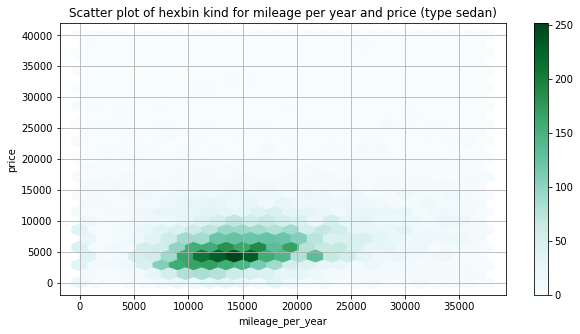

Correlation coefficient: 0.16549068802410993


In [74]:
#### 'mileage_per_year' and 'price'

print("#### 'mileage_per_year' and 'price':")
print()
print()

# Here the same reason as above for using the hexbin kind
df_sedan.plot(x='mileage_per_year', y='price', kind='hexbin', sharex=False, grid=True, gridsize=25, figsize=(10,5))
plt.title('Scatter plot of hexbin kind for mileage per year and price (type sedan)')
plt.show()

print("Correlation coefficient:", df_sedan['mileage_per_year'].corr(df_sedan['price']))

#### 'condition' and 'price':




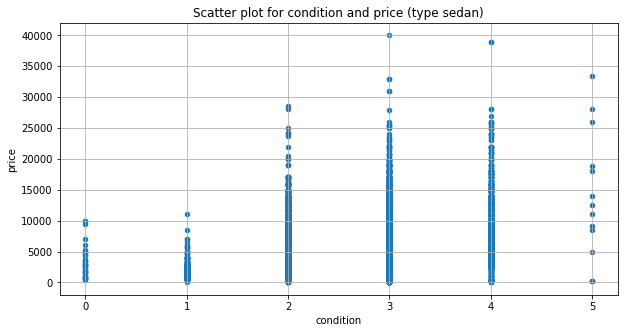

Correlation coefficient: 0.3004658559031809


In [75]:
#### 'condition' and 'price'

print("#### 'condition' and 'price':")
print()
print()

df_sedan.plot(x='condition', y='price', kind='scatter', sharex=False, grid=True, figsize=(10,5))
plt.title('Scatter plot for condition and price (type sedan)')
plt.show()

print("Correlation coefficient:", df_sedan['condition'].corr(df_sedan['price']))

#### 'paint_color' and 'price':


We group the vehicles by color and for each color we sort out the vehicles with less than 50 ads since they're not
valid for the analysis. In the following table are the colors with less than 50 counted values:

             price
paint_color       
orange           9
purple          24
yellow          22

The vehicles in the colors 'yellow', 'purple' and 'orange' will be filtered out for this analysis.

The following plot box-and-whisker charts show boxplots for each color:


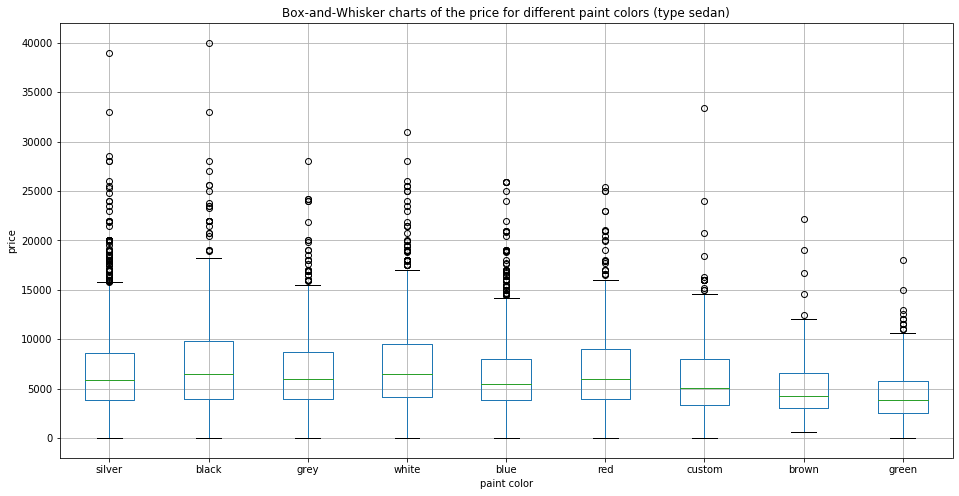

Description of the prices with the vehicle's color 'black':

count     1640.000000
mean      7281.993902
std       4353.892657
min          1.000000
25%       4000.000000
50%       6500.000000
75%       9800.000000
max      40000.000000
Name: black, dtype: float64

Description of the prices with the vehicle's color 'green':

count      200.000000
mean      4529.950000
std       2976.234984
min          1.000000
25%       2500.000000
50%       3800.000000
75%       5761.250000
max      17999.000000
Name: green, dtype: float64


In [76]:
#### 'paint_color' and 'price'

print("#### 'paint_color' and 'price':")
print()
print()
print("We group the vehicles by color and for each color we sort out the vehicles with less than 50 ads since they're not")
print("valid for the analysis. In the following table are the colors with less than 50 counted values:")
print()
# create a table with the colors that must be filtered as they have less than 50 prices
print(df_sedan.pivot_table(index='paint_color', values='price', aggfunc='count').query('price < 50'))
print()
print("The vehicles in the colors 'yellow', 'purple' and 'orange' will be filtered out for this analysis.")
print()
print("The following plot box-and-whisker charts show boxplots for each color:")

# filter out the corresponding colors in our df and safe it as a new df
df_sedan_color = df_sedan.query('paint_color != "yellow" and paint_color != "purple" and paint_color != "orange"')

# analog to above: create a column for each color and create a graph with all boxplots included
colors = df_sedan_color['paint_color'].value_counts().index
for color in colors:
    for i in df_sedan_color.index:
        if df_sedan_color.loc[i, 'paint_color'] == color:
            df_sedan_color.loc[i, color] = df_sedan_color.loc[i, 'price']

# The list 'colors' includes all transmission types that we have included for our analysis
df_sedan_color.boxplot(column=[colors[0], colors[1], colors[2], colors[3], colors[4], colors[5], colors[6], \
                             colors[7], colors[8]], figsize=(16, 8))
plt.title('Box-and-Whisker charts of the price for different paint colors (type sedan)')
plt.xlabel('paint color')
plt.ylabel('price')
plt.show()

print("Description of the prices with the vehicle's color 'black':")
print()
print(df_sedan_color['black'].describe())
print()
print("Description of the prices with the vehicle's color 'green':")
print()
print(df_sedan_color['green'].describe())

One can see quickly that all colors have outliers regarding the prices. The smallest range between lower and upper quartile is for the color 'green' which has a size of 3261. The biggest range is for the color 'black' which has a size of 5800. With a value of 6500 the color 'black' also has the biggest median of all colors whereas the color 'green' has the smallest median given by 3800. From color to color, small differences for median and quartile values can be observed.

#### 'transmission' and 'price':


I group the vehicles by transmission and for each type I sort out the vehicles with less than 50 ads since they're not
valid for the analysis. In the following table are the transmissions with less than 50 counted values:

Empty DataFrame
Columns: [price]
Index: []

There are no transmission types to sort out from our data.

The following plot box-and-whisker charts show boxplots for each transmission type:


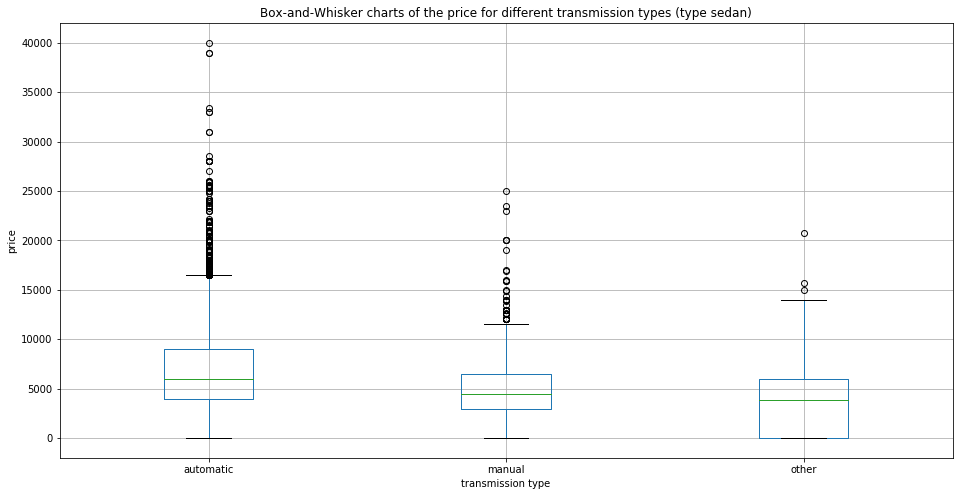

Description of the prices with the transmission type 'other':

count      115.000000
mean      4030.191304
std       4450.471451
min          1.000000
25%          1.000000
50%       3800.000000
75%       5995.000000
max      20700.000000
Name: other, dtype: float64


In [77]:
#### 'transmission' and 'price'

print("#### 'transmission' and 'price':")
print()
print()
print("I group the vehicles by transmission and for each type I sort out the vehicles with less than 50 ads since they're not")
print("valid for the analysis. In the following table are the transmissions with less than 50 counted values:")
print()
# create a table with the transmission types that must be filtered as they have less than 50 prices
print(df_sedan.pivot_table(index='transmission', values='price', aggfunc='count').query('price < 50'))
print()
print("There are no transmission types to sort out from our data.")
print()
print("The following plot box-and-whisker charts show boxplots for each transmission type:")

# safe the added columns to another df
df_sedan_transm = df_sedan

# analog to above: create a column for each transmission type and create a graph with all boxplots included
transmissions = df_sedan_transm['transmission'].value_counts().index
for transm in transmissions:
    for i in df_sedan_transm.index:
        if df_sedan_transm.loc[i, 'transmission'] == transm:
            df_sedan_transm.loc[i, transm] = df_sedan_transm.loc[i, 'price']

# The list 'transmissions' includes all transmission types that we have included for our analysis
df_sedan_transm.boxplot(column=[transmissions[0], transmissions[1], transmissions[2]], figsize=(16, 8))
plt.title('Box-and-Whisker charts of the price for different transmission types (type sedan)')
plt.xlabel('transmission type')
plt.ylabel('price')
plt.show()

print("Description of the prices with the transmission type 'other':")
print()
print(df_sedan_transm['other'].describe())

All transmission types show outliers in their boxplots. As already obsverved for the vehicle's type 'SUV', the transmission type 'other' has its lower quartile at the same price where its minimum is: at 1.0. The median values of the types 'other' and 'manual' are similar. The distances between lower and upper quartile vary between the transmission types: The type 'other' has the biggest distance, the type 'manual' the smallest. So, we have differently distributed price values for different transmission types for the vehicles of sedan type.

#### Conclusion

What factors impact the price most? <br>
Regarding the condtion of a vehicle, I used the int64 data types for getting correlation coefficients. <br>
Let's look at the correlation coefficients of the quantitative variables: <br>
- 'condition' and 'price': 0.28 (SUV) and 0.30 (sedan)
- 'age_when_posted' and 'price': -0.57 (SUV) and -0.60 (sedan)
- 'mileage_per_year' and 'price': 0.23 (SUV) and 0.17 (sedan)

Here one can see that the only variable that is moderately correlated with 'price' is 'age_when_posted'. The minus sign indicates: The older a vehicle the lower its price. The other variables have too small correlation coefficients for saying that there's a low correlation. <br>
When looking at the categorial variable 'transmission', one can see that for both types the transmission type 'other' has the minimum and the lower quartile at a price of 1. If one supposes that some of these prices are wrong, it's still unliekly that this price is wrong for over a quarter of all vehicles of that transmission type. So, one can say that there's an impact on the vehicle's price when its transmission type is counted among 'other'. <br>
A special color for SUV typed vehicles is orange; they're above-average expensive. So, it's possible that for special types of vehicle some colors may differ in price (since for sedans there was no such above-average expensive color). <br>
When comparing the box-and-whisker charts for both types one can observe that the SUVs are more expensive in general: The median values by color vary for sedans between 3800 and 6500 whereas for SUVs the median values vary between approx. 6000 and 9000. So, as indicated by the previous analysis in step 4.4 the vehicle's type has an impact on the price.

<a id="4"></a>

## 4) Overall conclusion

The column 'mileage_per_year' was calculated with the column 'odometer'. Here, we need to be careful since the odometer column was the column with the most missing values (7892 missing values). The weighted standard deviation for the odometer medians in the grouped table is 32694. That might be a reason for the very small correlation coefficients between 'mileage_per_year' and 'price' (0.23 for SUV and 0.17 for sedan). For filling the missing model years (3619 missing values) I used a pivot table with the vehicle's models as index. The biggest standard deviation grouped by model was approx. 12 and it decreased rapidly in the sorted pivot table. Since there where less than half missing values to fill compared to the column 'odometer', we can say that these values are filled with particular good values. This might also be mirrored when looking again at the correlation coefficients: 'age_when_posted' and 'price': -0.57 (SUV) and -0.60 (sedan). Both coefficients show a moderate correlation, so we can say:<br> <br> 
The age of a vehicle is moderately negatively correlated with its price. <br>
The older a vehicle the smaller its price. <br> <br>
We observed that there's a dependency between the mean prices and the vehicle's type: <br> Some types are overall more expensive than other types. <br> <br> 
A special observation provided transmission types. We can say: <br>
When a vehicle has not automatic or manual as transmission type then likely there exist some vehicles with substandardly small prices. <br>
What we also observed is that there might be specific colors for some types that also have a surpassing impact on the vehicle's price (compare: orange SUVs).